# 投影変換

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def warpAffine():
    img = cv2.imread('images/sample5.png')
    
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[40,40],[200,50],[50,200]])
    
    M = cv2.getAffineTransform(pts1, pts2)
    
    result = cv2.warpAffine(img, M, (275, 275))
    
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].set_title('original')
    axs[0].imshow(img)
    axs[1].set_title('Affine Transform')
    axs[1].imshow(result)
    plt.show()

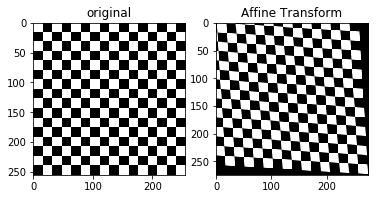

In [3]:
warpAffine()

In [4]:
def warpPerspective():
    img = cv2.imread('images/sample6.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    topLeft = [230,35]
    topRight = [350,10]
    bottomRight = [310,250]
    bottomLeft = [160,270]
    
    pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])
    
    w1 = abs(bottomRight[0] - bottomLeft[0])
    w2 = abs(topRight[0] - topLeft[0])
    h1 = abs(topRight[1] - bottomRight[1])
    h2 = abs(topLeft[1] - bottomLeft[1])
    minWidth = min([w1, w2])
    minHeight = min([h1, h2])
    
    pts2 = np.float32([[0,0],[minWidth-1,0],
                      [minWidth-1,minHeight-1],[0,minHeight-1]])
    
    M = cv2.getPerspectiveTransform(pts1, pts2)
    
    result = cv2.warpPerspective(img, M, (int(minWidth), int(minHeight)))
    
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].set_title('original')
    axs[0].imshow(img)
    axs[1].set_title('Perspective Transform')
    axs[1].imshow(result)
    plt.show()
    

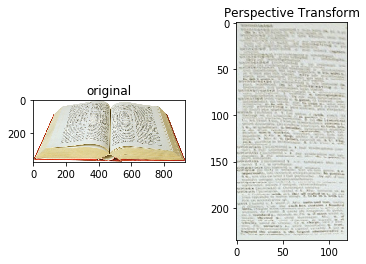

In [5]:
warpPerspective()